In [99]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
import statsmodels.api as sm

In [100]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [101]:
# Adding some random noise to salaries to reduce accuracy

noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [102]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [103]:
# Step 3 : Create a Linear Regression Model
model = LinearRegression()

In [104]:
# Step 4 : Train the model using the dataset
model.fit(X, Y)

LinearRegression()

In [105]:
# Step 5 : Get the values of slope(m) and intercept (c) from the trained model
m = model.coef_[0]
c = model.intercept_
print("Coefficent/Slope : ", m)
print("Intercept : ", c)

Coefficent/Slope :  4.965498141580591
Intercept :  27.430065779800536


In [106]:
# Step 6 : Display the equation of the line
print(f"Equation of the line : Y = {m:.2f}X + {c:.2f}")

Equation of the line : Y = 4.97X + 27.43


In [107]:
# Step 7 : Predict values using the model
Y_pred = model.predict(X) # Predict salaries for the given experience values

In [108]:
Y_pred

array([32.39556392, 37.36106206, 42.3265602 , 47.29205835, 52.25755649,
       57.22305463, 62.18855277, 67.15405091, 72.11954905, 77.0850472 ])

## Model Evaluation

In [109]:
# 1. Mean Squared Error (MSE) - Measures average squared difference between actual and predicted values
mse = mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error (MSE) : {mse:.2f}")

Mean Squared Error (MSE) : 11.75


In [110]:
# 2. Mean Absolute Error (MAE) - Measures average absolute difference between actual and predicted values
mae = mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error (MAE) : {mae:.2f}")

Mean Absolute Error (MAE) : 2.87


In [111]:
# 3. Root Mean Squared Error (RMSE) - Measures standard deviation of residuals (errors)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")

Root Mean Squared Error (RMSE) : 3.43


In [112]:
# 4. R-squared - Represents how well the model fits the data (0 to 1, where 1 is best)
r2 = r2_score(Y, Y_pred)
print(f"R-squared : {r2:.2f}")

R-squared : 0.95


In [113]:
# 5. Adjusted R-squared - Adjusted for the number of predictors, better for multiple regression

n = len(Y) # Number of observations
p = 1 # Number of independent variables (Experience)
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Adjusted R-squared : {adj_r2:.2f}")

Adjusted R-squared : 0.94


In [114]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression

X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression

ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model

print("\nOLS Regression Summary:\n")

print(ols_model.summary())  # Display detailed statistical summary
 


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        12:25:33   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\pardh\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


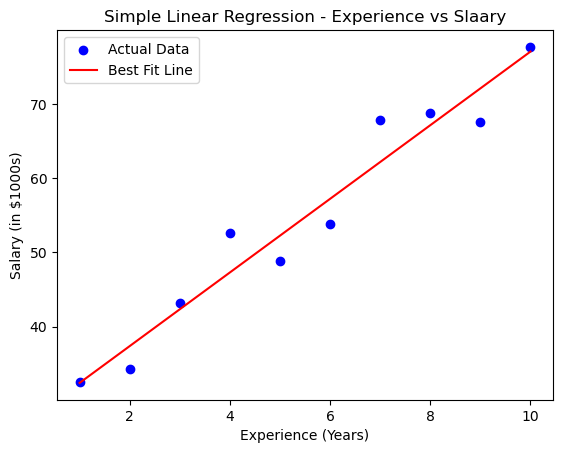

In [115]:
# Step 8 : Plot the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data') # Scatter plot of actual values

# Step 9 : Plot the Regression Line (Best Fit Line)
plt.plot(X, Y_pred, color='red', label='Best Fit Line') # Regression Line

# Step 10 : Add labels and legend
plt.xlabel('Experience (Years)') # Label for X-axis
plt.ylabel('Salary (in $1000s)') # Label for Y-axis
plt.title('Simple Linear Regression - Experience vs Slaary') # Title of the plot
plt.legend() # show legend

# Step 11 : Display the graph
plt.show() # show the final plotted graph

In [116]:
# User can input experience, and the model will predict salary
while True:
    try:
        exp = float(input("Enter years of exprience to predict salary (enter any negative number to exit) : "))
        if exp < 0:
            break # Exit the loop
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of exprience : ${predicted_salary:.2f} K")
    except ValueError:
        print("Please enter a valid number !")

Enter years of exprience to predict salary (enter any negative number to exit) : 1
Predicted Salary for 1.0 years of exprience : $32.40 K
Enter years of exprience to predict salary (enter any negative number to exit) : 2
Predicted Salary for 2.0 years of exprience : $37.36 K
Enter years of exprience to predict salary (enter any negative number to exit) : -2
